
## 1. Importation des packages

In [1]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from difflib import SequenceMatcher

## 2. Importation des données

In [2]:
artists = pd.read_csv("../Data/artists.csv")
tracks = pd.read_csv("../Data/tracks.csv")
spotify_top200_global = pd.read_csv("../Data/spotify_top200_global.csv")

## 3. Analyse descriptive des bases et visualisation

### 3.1. Informations Descriptives

In [569]:
# Taille des datasets
print(f" La table 'artists' est composée de:\n {artists.shape[0]} lignes \n {artists.shape[0]} colonnes")
print('─' * 75)
print(f" La table 'tracks' est composée de:\n {tracks.shape[0]} lignes \n {tracks.shape[1]} colonnes")
print('─' * 75)
print(f" La table 'spotify_top200_global' est composée de:\n {spotify_top200_global.shape[0]} lignes \n {spotify_top200_global.shape[1]} colonnes")


 La table 'artists' est composée de:
 1162095 lignes 
 1162095 colonnes
───────────────────────────────────────────────────────────────────────────
 La table 'tracks' est composée de:
 586672 lignes 
 20 colonnes
───────────────────────────────────────────────────────────────────────────
 La table 'spotify_top200_global' est composée de:
 73200 lignes 
 6 colonnes


In [570]:
# Nom des colonnes. 
print(f" Les colonnes de 'Artists' sont:\n {artists.columns}")
print('─' * 100)
print(f" Les colonnes de 'Tracks' sont:\n {tracks.columns}")
print('─' * 100)
print(f" Les colonnes de 'Spotify top 200 global' sont:\n {spotify_top200_global.columns}")

 Les colonnes de 'Artists' sont:
 Index(['id', 'followers', 'genres', 'name', 'popularity'], dtype='object')
────────────────────────────────────────────────────────────────────────────────────────────────────
 Les colonnes de 'Tracks' sont:
 Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')
────────────────────────────────────────────────────────────────────────────────────────────────────
 Les colonnes de 'Spotify top 200 global' sont:
 Index(['Artist', 'Country', 'Date', 'Rank', 'Streams', 'Title'], dtype='object')


In [571]:
# Types des données dans chaque colonne. 
print(f"Dans ces trois tables ci-dessous, nous pouvons voir le type de variables\nque nous avons pour chacune des colonnes.")
print('─' * 100)
artists.info()
print('─' * 100)
tracks.info()
print('─' * 100)
spotify_top200_global.info()

Dans ces trois tables ci-dessous, nous pouvons voir le type de variables
que nous avons pour chacune des colonnes.
────────────────────────────────────────────────────────────────────────────────────────────────────
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162092 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB
────────────────────────────────────────────────────────────────────────────────────────────────────
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  


In [572]:
artists.describe()

,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


In [573]:
tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [574]:
spotify_top200_global.describe()

,Rank,Streams
count,73200.0000,7.320000e+04
mean,100.5000,1.300491e+06
std,57.7347,8.900651e+05
min,1.0000,5.578390e+05
25%,50.7500,7.678645e+05
50%,100.5000,9.755045e+05
75%,150.2500,1.486872e+06
max,200.0000,1.722324e+07



**Artists**:
-  La commande de describe nous permet de valiser que Popularity est compris enter 0 et 100.<br>
De même nous voyons que la personne la plus suivie a 80.000.000 de followers.

**Tracks**
- Une quantité d'indicateurs qui sont mésurés de façon différente. À exploiter.

**Spotify top 200**
- Nous corroborons que le rang maximal est bel et bien 200. 


### 3.2. Visualisation

In [575]:
artists.sample(5)

,id,followers,genres,name,popularity
187275,7hsyLArBqyxYqQF2ODoT3c,9448.0,['synthwave'],Turbo Knight,39
591405,29mKgeuCbQGSYhpjVDMtQL,14.0,[],Babies In Limbo,0
216707,5bibcgxtb9qLgzNOdxCiXy,1331.0,[],Dinesh Kanagaratnam,24
1014521,4z3arARDNAphZoOKDGAdR1,1825.0,['dark post-punk'],White Hex,20
606748,0kBWyAf2SEdOkZsWC7pFAK,64.0,[],Purple Mountain,1


Pour la table des **artistes** nous constatons notamment que : 
- La variable **Genres** est une liste de types de musiques auxquelles\
le musicien pourrait appartenir.
- La variable **Popularity** semble être mesuré de 0 à 100.

In [576]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Pour la table des **tracks** nous constatons notamment que : 
- La variable **Popularity** semble être mesuré de 0 à 100.
- La variable **Explicit** est à 1 lorsque la musique contient un langage explicit. 
- La variable **Artists** est une liste des musiciens faisant partie du titre.
- **Key** correspond à la note principale de la chanson. 
- **Mode** répresente la modalité de la chanson. Majeure ou mineure. 

In [577]:
spotify_top200_global.sample(5)

,Artist,Country,Date,Rank,Streams,Title
8188,Jonas Brothers,Global,2020-02-10,189,678005,Only Human
18542,Dua Lipa,Global,2020-04-02,143,761331,Love Again
31616,Ariana Grande,Global,2020-06-07,17,2139898,Stuck with U (with Justin Bieber)
72247,Lewis Capaldi,Global,2020-12-27,48,1260461,Before You Go
19869,Dan + Sha,Global,2020-04-09,70,1074967,"10,000 Hours (with Justin Bieber)"


## 4. Analyse

### 4.1. Top 10 Artistes les plus populaires.

In [578]:
# Quels sont les 10 artistes les plus populaires ? Afficher graphiquement leur nombre d’abonnés par ordre décroissant.
popularity_top10 = artists.sort_values(by ='popularity', ascending=False).head(10)

/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_71561/1066571752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_top10,x='name',y='popularity', palette='pastel')


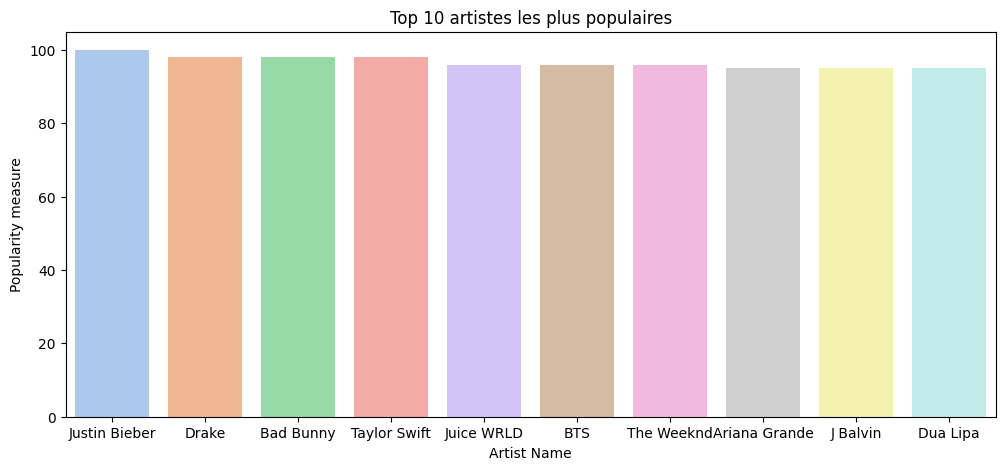

In [579]:
plt.figure(figsize=(12,5))
sns.barplot(data=popularity_top10,x='name',y='popularity', palette='pastel')
plt.xlabel('Artist Name')
plt.ylabel('Popularity measure')
plt.title('Top 10 artistes les plus populaires')
plt.show()

In [580]:
# Quels sont les 10 artistes les plus populaires ? Afficher graphiquement leur nombre d’abonnés par ordre décroissant.
popularity_top10 = popularity_top10 .sort_values(by ='followers', ascending=False)

In [581]:
popularity_top10

,id,followers,genres,name,popularity
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96
144483,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"['canadian contemporary r&b', 'canadian pop', ...",The Weeknd,96
144486,1vyhD5VmyZ7KMfW5gqLgo5,27286822.0,"['latin', 'reggaeton', 'reggaeton colombiano',...",J Balvin,95
144487,6M2wZ9GZgrQXHCFfjv46we,24123468.0,"['dance pop', 'pop', 'uk pop']",Dua Lipa,95
115490,4MCBfE4596Uoi2O4DtmEMz,16996777.0,"['chicago rap', 'melodic rap']",Juice WRLD,96


/var/folders/_f/gtq3qbvd7c5_b0bs10fy129h0000gn/T/ipykernel_71561/3324884087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popularity_top10,x='name',y='followers', palette='pastel')


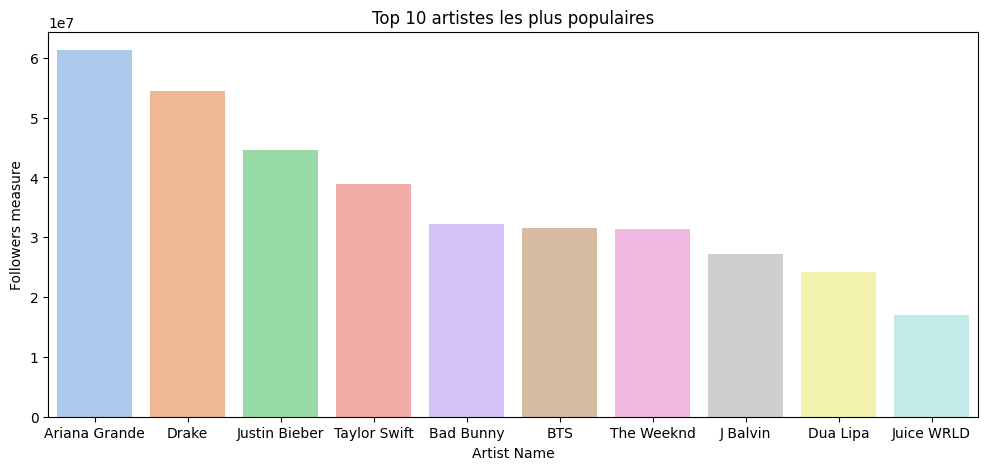

In [582]:
plt.figure(figsize=(12,5))
sns.barplot(data=popularity_top10,x='name',y='followers', palette='pastel')
plt.xlabel('Artist Name')
plt.ylabel('Followers measure')
plt.title('Top 10 artistes les plus populaires')
plt.show()

### 4.2. Nombre de chansons par année

In [583]:
tracks['year'] = tracks['release_date'].str[0:4]
songs_yearly = pd.DataFrame(tracks[['year','id']].groupby('year').nunique())
songs_yearly = songs_yearly.reset_index()

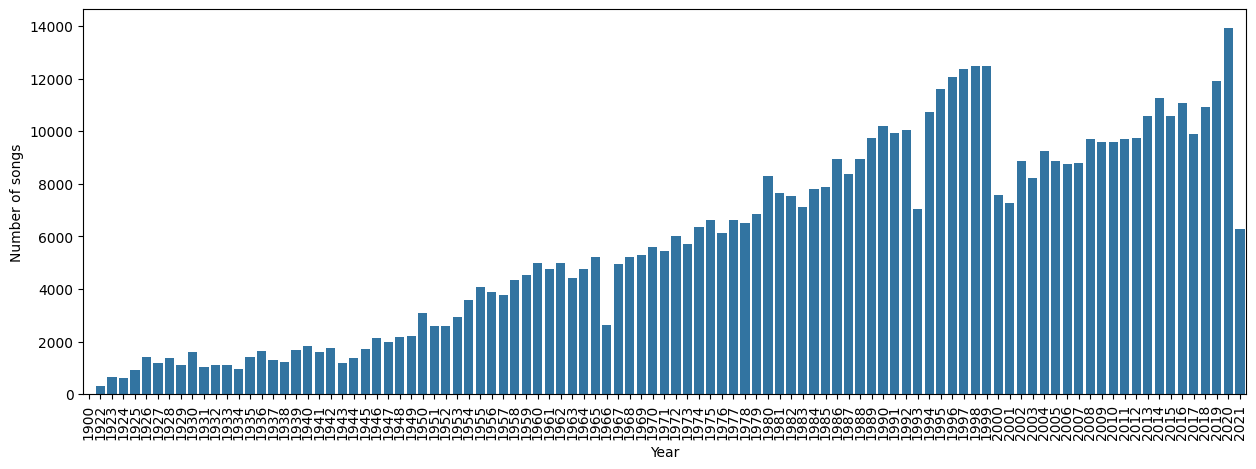

In [584]:
plt.figure(figsize=(15,5))
sns.barplot(data = songs_yearly, x = 'year', y = 'id')
plt.xlabel('Year')
plt.ylabel("Number of songs")
plt.xticks(rotation=90)
plt.show()

### 4.3. Artistes avec les plus de chansons dans le top 200

#### 4.3.1. Basique

In [585]:
songs_by_artists = spotify_top200_global.groupby("Artist").agg({"Title":"nunique"}).reset_index().sort_values(by='Title', ascending=False)
songs_by_artists = songs_by_artists.reset_index().drop(columns='index').drop_duplicates(keep='first')
songs_by_artists.head(5)

,Artist,Title
0,Taylor Swift,38
1,Lil Uzi Vert,35
2,BTS,31
3,Eminem,28
4,Juice WRLD,27


### 4.4. Lien entre popularité et d'autres critères 

In [596]:
tracks_corr = tracks.select_dtypes(exclude='object')

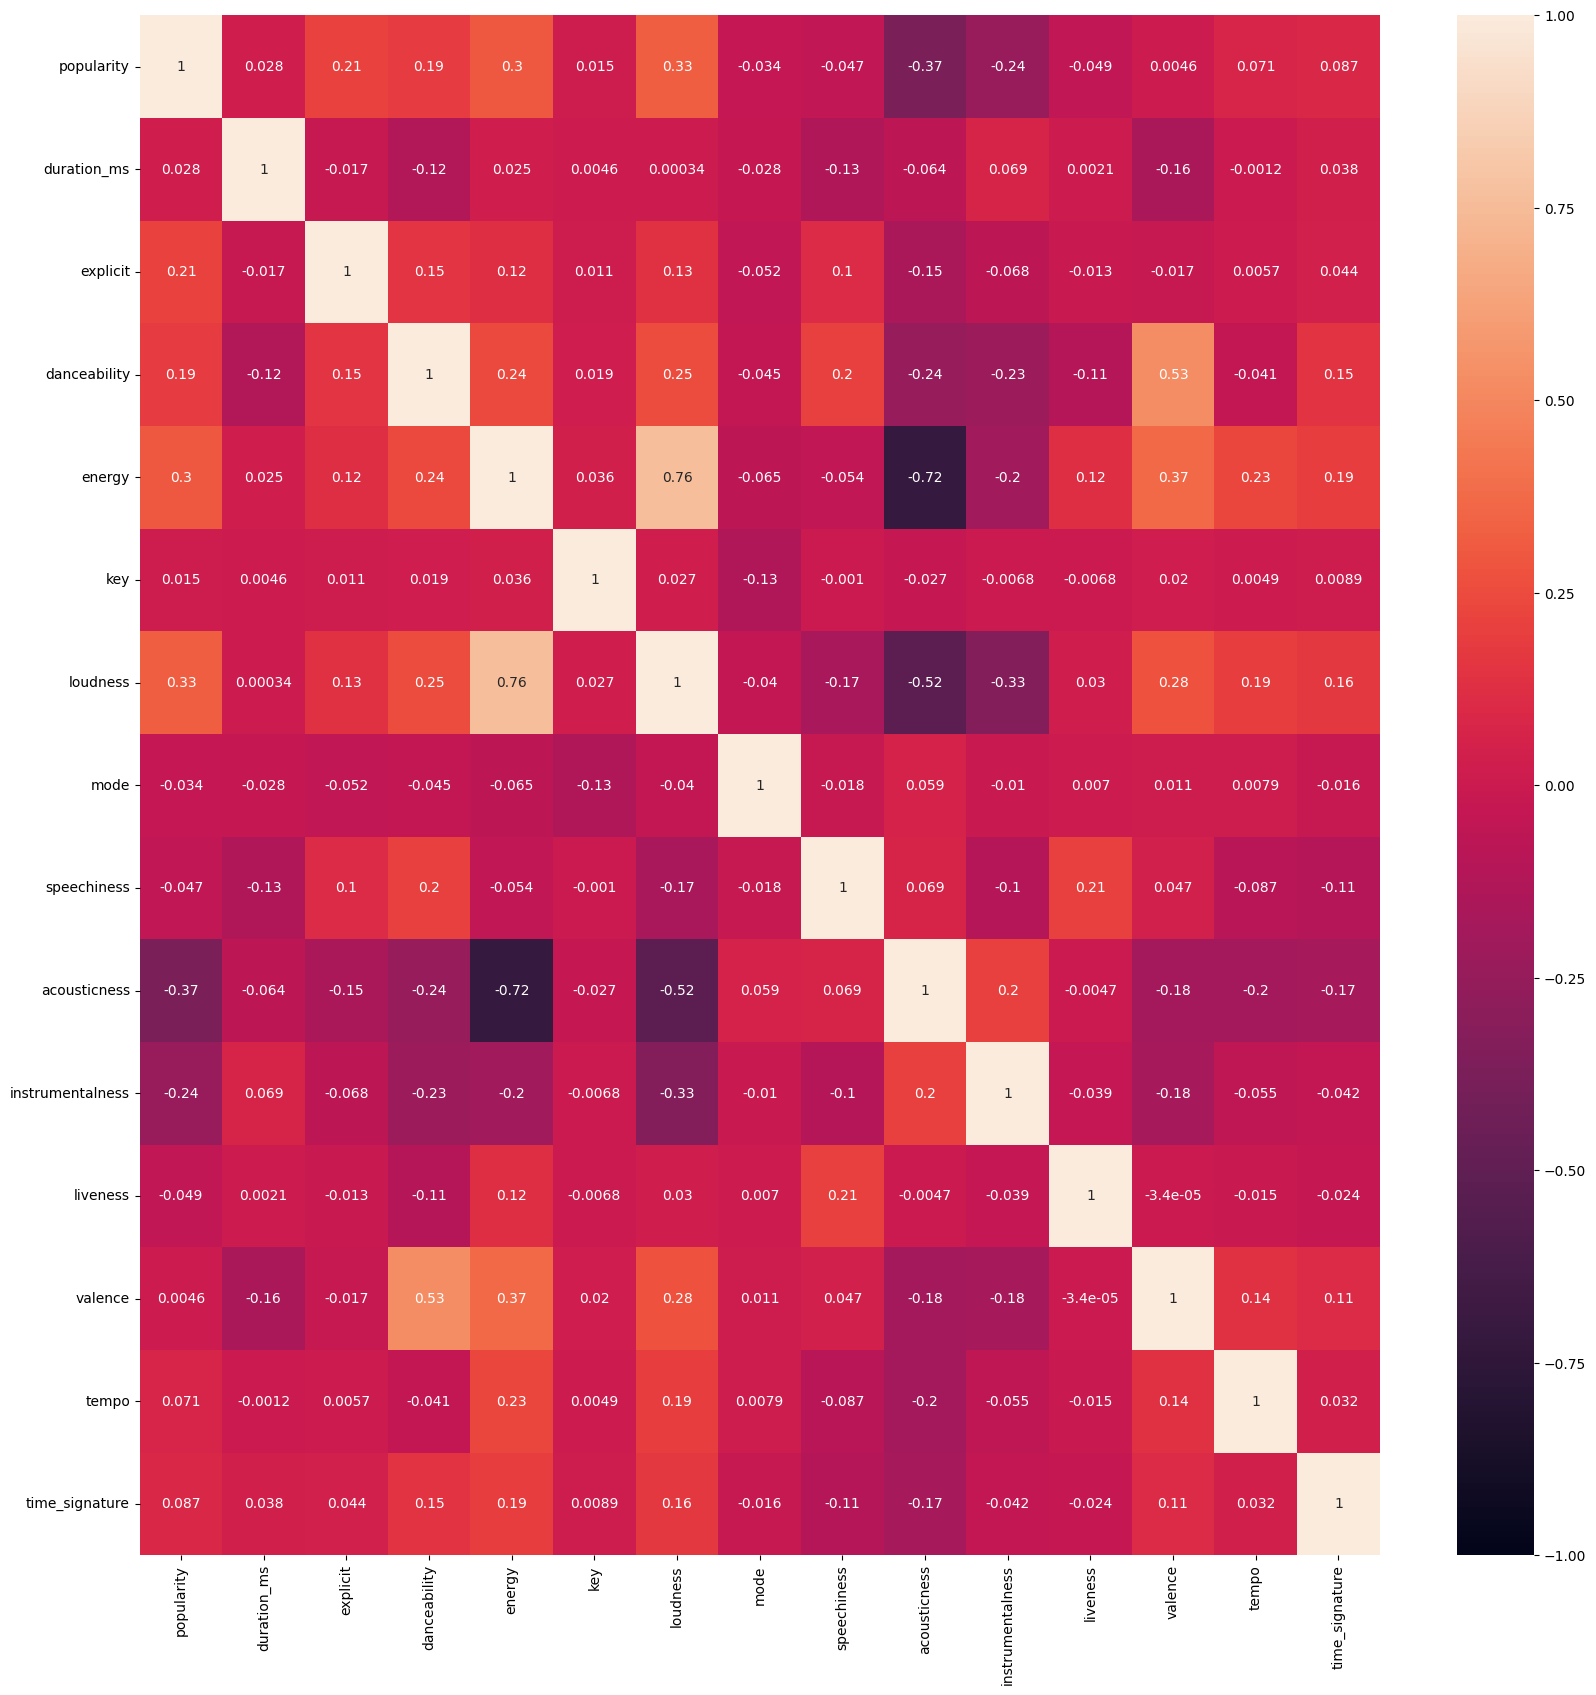

In [597]:
plt.figure(figsize=(20,20))
sns.heatmap(tracks_corr.corr('pearson'), vmin =-1, vmax= +1,   square = False, annot = True)
plt.show()